In [66]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from myBuilding import runMyBEM
from runMyBuildingMC import getConstructions, getWeatherData, setConstructionType
from model.WallSimulation import convectionDOE2
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
material_type = "Light"
materials = getConstructions("My", constructionFile = "energyPlus/My_Constructions.csv")
chosenMaterial = setConstructionType(materials, material_type)

In [68]:
dt = 30
chosenZone = 12
chosenMonth = 9
data, climate_zones = getWeatherData()
dataSampled = data[(data["ClimateZone"] == chosenZone) & (data.index.month == chosenMonth)]
dataSampled = dataSampled.iloc[1:]
dataSampled = dataSampled.infer_objects(copy=False)
dataSampled = dataSampled.resample(f"{dt}s").interpolate()

/var/folders/z4/gbjchz2x4hs8f0k6b6t8m5jm0000gn/T/ipykernel_76065/2004456806.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataSampled = dataSampled.resample(f"{dt}s").interpolate()


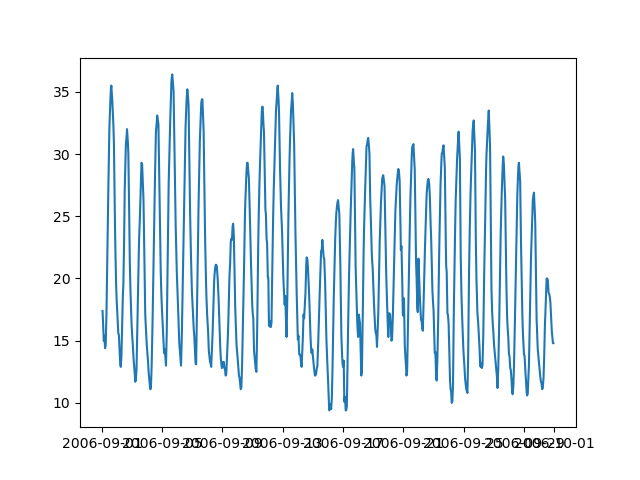

In [69]:
plt.figure()
plt.plot(dataSampled["Dry Bulb Temperature"][1:])

In [70]:
floorTempAdjustment = np.mean([-3.5, -5])
hInterior = np.mean([1, 3])
alphaRoof = np.mean([0.6, 0.9])
windSpeed = np.mean([0, 6])
windSpeed = np.mean([0, 6])
wallRoughness = np.mean([1.11, 2.17])
hExterior = convectionDOE2(np.mean([1, 3]), windSpeed, wallRoughness) #using DOE-2 to calculate this

floor material:
                                              key    Roughness  Thickness  \
index                                                                       
Plywood (Douglas Fir) - 12.7mm           Material       Smooth   0.040544   
I05 154mm batt insulation                Material    VeryRough   0.081088   
F05 Ceiling air space resistance  Material:AirGap          NaN   0.040544   
M15 200mm heavyweight concrete           Material  MediumRough   0.202719   
Soil                                     Material          NaN   0.486525   

                                  Conductivity   Density  Specific_Heat  \
index                                                                     
Plywood (Douglas Fir) - 12.7mm        0.037589   540.000     379.022658   
I05 154mm batt insulation             0.058563    19.000    1124.415040   
F05 Ceiling air space resistance      0.225243     1.293    1005.000000   
M15 200mm heavyweight concrete        1.954629  2240.000     902.1365

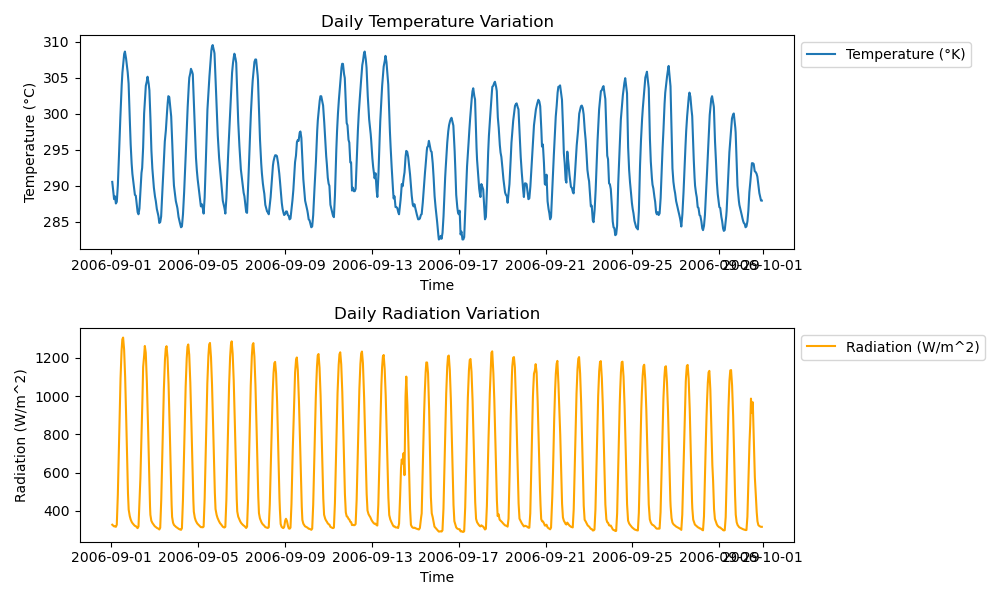

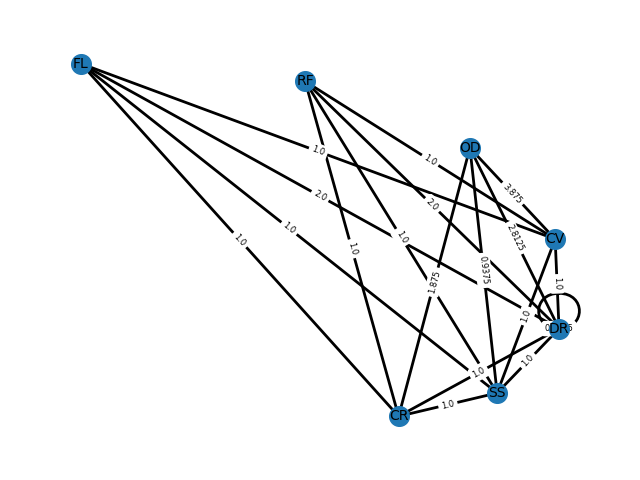

Initializing radiation for CR
Initializing radiation for SS
Initializing radiation for DR
Initializing radiation for CV
Initializing radiation for OD
Initializing radiation for RF
Initializing radiation for FL


In [ ]:
runMyBEM(
    dataSampled,
    materials,
    floorTempAdjustment,
    hInterior,
    hExterior,
    alphaRoof,
    verbose = True,
    makePlots = True)